In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('customer_support_tickets.csv')
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [3]:
df.columns

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [5]:
df.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

In [6]:
df.shape

(8469, 17)

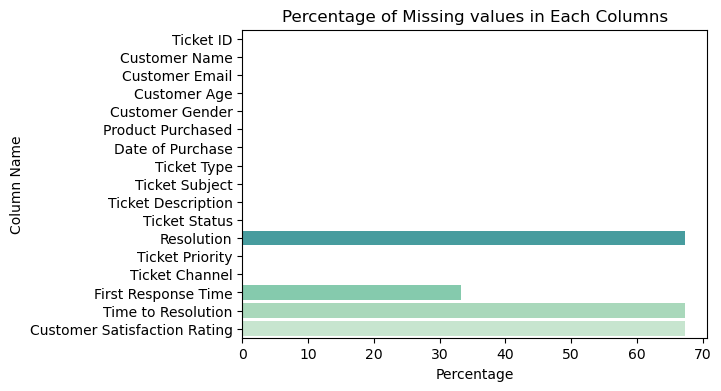

In [7]:
missing = df.isnull().sum()/len(df)*100

plt.figure(figsize=(6,4))
sns.barplot(y=missing.index,x=missing.values,palette = 'mako')
plt.title('Percentage of Missing values in Each Columns')
plt.xlabel('Percentage')
plt.ylabel('Column Name')
plt.show()

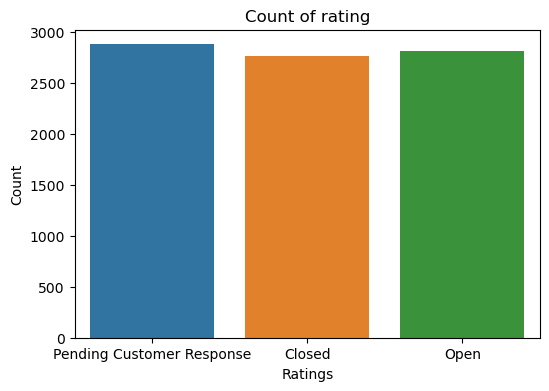

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x=df['Ticket Status'])
plt.title('Count of rating')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

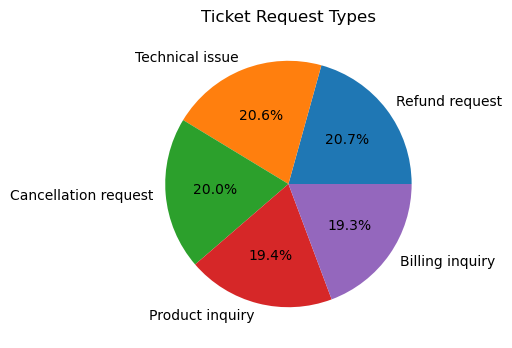

In [9]:
plt.figure(figsize=(6,4))
ticket_types = df['Ticket Type'].value_counts()
plt.pie(ticket_types.values,labels=ticket_types.index,autopct='%0.1f%%')
plt.title('Ticket Request Types')
plt.show()

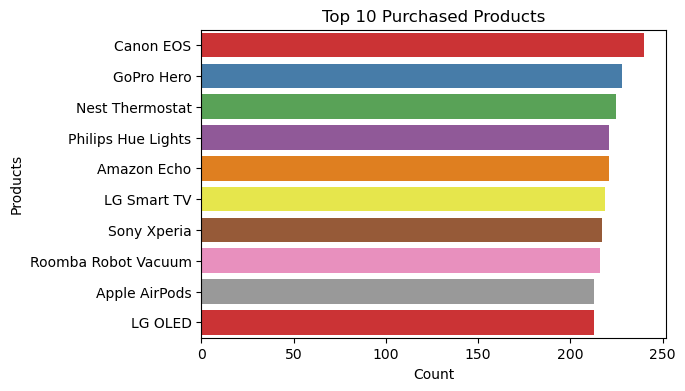

In [10]:
top_products = df['Product Purchased'].value_counts().head(10)

plt.figure(figsize=(6,4))
sns.barplot(x=top_products.values,y=top_products.index,palette = 'Set1')
plt.title('Top 10 Purchased Products')
plt.xlabel('Count')
plt.ylabel('Products')
plt.show()

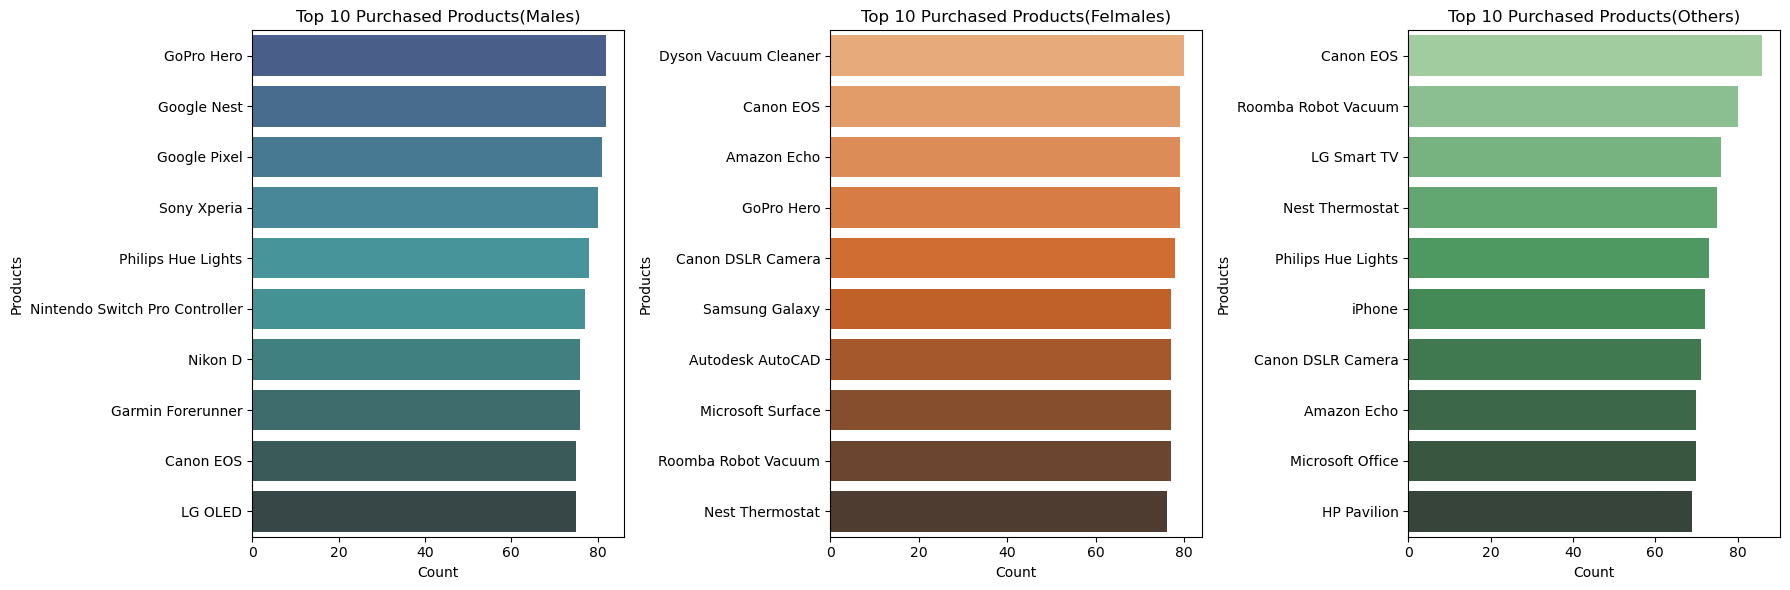

In [11]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
top_products_male = df[df['Customer Gender']=='Male']['Product Purchased'].value_counts().head(10)
sns.barplot(x=top_products_male.values,y=top_products_male.index,palette = 'mako_d')
plt.title('Top 10 Purchased Products(Males)')
plt.xlabel('Count')
plt.ylabel('Products')

plt.subplot(1,3,2)
top_products_female = df[df['Customer Gender']=='Female']['Product Purchased'].value_counts().head(10)
sns.barplot(x=top_products_female.values,y=top_products_female.index,palette = 'Oranges_d')
plt.title('Top 10 Purchased Products(Felmales)')
plt.xlabel('Count')
plt.ylabel('Products')

plt.subplot(1,3,3)
top_products_other = df[df['Customer Gender']=='Other']['Product Purchased'].value_counts().head(10)
sns.barplot(x=top_products_other.values,y=top_products_other.index,palette = 'Greens_d')
plt.title('Top 10 Purchased Products(Others)')
plt.xlabel('Count')
plt.ylabel('Products')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Count')

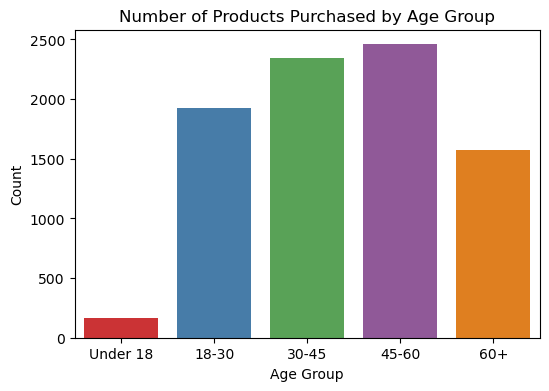

In [12]:
bins=[0,18,30,45,60,100]
labels=['Under 18','18-30','30-45','45-60','60+']

df['Age Group'] = pd.cut(df['Customer Age'],bins=bins,labels=labels)

ticket_per_age_group = df.groupby('Age Group').size()

plt.figure(figsize=(6,4))
sns.barplot(x=ticket_per_age_group.index,y=ticket_per_age_group.values,palette = 'Set1')
plt.title('Number of Products Purchased by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')


In [13]:
new_df = df[df['Ticket Status'] == 'Closed']
new_df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Age Group
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,45-60
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,18-30
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,60+
10,11,Joseph Moreno,mbrown@example.org,48,Male,Nintendo Switch,2021-01-19,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,Closed,Measure tonight surface feel forward.,High,Phone,2023-06-01 17:46:49,2023-05-31 23:51:49,1.0,45-60
11,12,Brandon Arnold,davisjohn@example.net,51,Male,Microsoft Xbox Controller,2021-10-24,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,Closed,Measure there house management pick knowledge ...,High,Chat,2023-06-01 12:05:51,2023-06-01 09:27:51,1.0,45-60


In [14]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2769 entries, 2 to 8467
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Ticket ID                     2769 non-null   int64   
 1   Customer Name                 2769 non-null   object  
 2   Customer Email                2769 non-null   object  
 3   Customer Age                  2769 non-null   int64   
 4   Customer Gender               2769 non-null   object  
 5   Product Purchased             2769 non-null   object  
 6   Date of Purchase              2769 non-null   object  
 7   Ticket Type                   2769 non-null   object  
 8   Ticket Subject                2769 non-null   object  
 9   Ticket Description            2769 non-null   object  
 10  Ticket Status                 2769 non-null   object  
 11  Resolution                    2769 non-null   object  
 12  Ticket Priority               2769 non-null   object 

In [15]:
df['Ticket Description'].iloc[12]

"I'm having an issue with the {product_purchased}. Please assist.\n\nCQW: Why didn't I send him the invoice? Thanks a lot.\n\nL: He's like the best customer I've met. I've noticed that the issue occurs consistently when I use a specific feature or application on my {product_purchased}."

In [16]:
# customer age
# customer gender
# product purchased 
# Ticket Type
# Ticket Subject
# Ticket Channel

# cusotmer Satisfaction Rating

In [17]:
new_df.drop(columns=['Ticket ID', 'Customer Name', 'Customer Email','Date of Purchase', 
                     'Ticket Description','Ticket Status', 'Resolution','Ticket Priority',
                     'First Response Time', 'Time to Resolution'
                    ],inplace=True,axis=1)

In [18]:
new_df.head()

,Customer Age,Customer Gender,Product Purchased,Ticket Type,Ticket Subject,Ticket Channel,Customer Satisfaction Rating,Age Group
2,48,Other,Dell XPS,Technical issue,Network problem,Social media,3.0,45-60
3,27,Female,Microsoft Office,Billing inquiry,Account access,Social media,3.0,18-30
4,67,Female,Autodesk AutoCAD,Billing inquiry,Data loss,Email,1.0,60+
10,48,Male,Nintendo Switch,Cancellation request,Data loss,Phone,1.0,45-60
11,51,Male,Microsoft Xbox Controller,Product inquiry,Software bug,Chat,1.0,45-60


In [19]:
new_df.reset_index(drop=True)

,Customer Age,Customer Gender,Product Purchased,Ticket Type,Ticket Subject,Ticket Channel,Customer Satisfaction Rating,Age Group
0,48,Other,Dell XPS,Technical issue,Network problem,Social media,3.0,45-60
1,27,Female,Microsoft Office,Billing inquiry,Account access,Social media,3.0,18-30
2,67,Female,Autodesk AutoCAD,Billing inquiry,Data loss,Email,1.0,60+
3,48,Male,Nintendo Switch,Cancellation request,Data loss,Phone,1.0,45-60
4,51,Male,Microsoft Xbox Controller,Product inquiry,Software bug,Chat,1.0,45-60
...,...,...,...,...,...,...,...,...
2764,62,Female,MacBook Pro,Refund request,Display issue,Phone,3.0,60+
2765,61,Other,iPhone,Billing inquiry,Peripheral compatibility,Chat,5.0,60+
2766,54,Other,Dyson Vacuum Cleaner,Billing inquiry,Refund request,Email,1.0,45-60
2767,57,Female,GoPro Action Camera,Technical issue,Account access,Social media,3.0,45-60


In [20]:
new_df['Product Purchased']=new_df['Product Purchased'].astype('category')

In [21]:
new_df['Customer Gender']=new_df['Customer Gender'].astype('category')
new_df['Ticket Type']=new_df['Ticket Type'].astype('category')
new_df['Ticket Subject']=new_df['Ticket Subject'].astype('category')
new_df['Ticket Channel']=new_df['Ticket Channel'].astype('category')

In [22]:
new_df.dtypes

Customer Age                       int64
Customer Gender                 category
Product Purchased               category
Ticket Type                     category
Ticket Subject                  category
Ticket Channel                  category
Customer Satisfaction Rating     float64
Age Group                       category
dtype: object

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
label_encoder=LabelEncoder()

In [25]:
new_df['Product Purchased']=label_encoder.fit_transform(new_df['Product Purchased'])
new_df['Customer Gender']=label_encoder.fit_transform(new_df['Customer Gender'])
new_df['Ticket Type']=label_encoder.fit_transform(new_df['Ticket Type'])
new_df['Ticket Subject']=label_encoder.fit_transform(new_df['Ticket Subject'])
new_df['Ticket Channel']=label_encoder.fit_transform(new_df['Ticket Channel'])

In [26]:
new_df['Age Group']=label_encoder.fit_transform(new_df['Age Group'])

In [27]:
new_df.head()

,Customer Age,Customer Gender,Product Purchased,Ticket Type,Ticket Subject,Ticket Channel,Customer Satisfaction Rating,Age Group
2,48,2,10,4,8,3,3.0,2
3,27,0,25,0,0,3,3.0,0
4,67,0,5,0,3,1,1.0,3
10,48,1,30,1,3,2,1.0,2
11,51,1,27,2,15,0,1.0,2


In [28]:
new_df['Customer Satisfaction Rating'].value_counts()

Customer Satisfaction Rating
3.0    580
1.0    553
2.0    549
5.0    544
4.0    543
Name: count, dtype: int64

In [29]:
new_df.columns

Index(['Customer Age', 'Customer Gender', 'Product Purchased', 'Ticket Type',
       'Ticket Subject', 'Ticket Channel', 'Customer Satisfaction Rating',
       'Age Group'],
      dtype='object')

In [30]:
X = new_df[['Customer Gender', 'Ticket Type','Ticket Subject', 'Ticket Channel','Product Purchased']]
y = new_df[['Customer Satisfaction Rating']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

print('The shape of train dataset : ',X_train.shape)
print('The shape of test dataset : ',X_test.shape)

The shape of train dataset :  (2215, 5)
The shape of test dataset :  (554, 5)


In [31]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
y_pred = rfc.predict(X_test)

In [33]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.21660649819494585
Classification Report:
               precision    recall  f1-score   support

         1.0       0.20      0.18      0.19       109
         2.0       0.22      0.21      0.22       117
         3.0       0.21      0.23      0.22       112
         4.0       0.22      0.24      0.23       108
         5.0       0.24      0.21      0.22       108

    accuracy                           0.22       554
   macro avg       0.22      0.22      0.22       554
weighted avg       0.22      0.22      0.22       554

Confusion Matrix:
 [[20 25 25 21 18]
 [19 25 30 28 15]
 [20 24 26 22 20]
 [20 18 23 26 21]
 [22 20 21 22 23]]


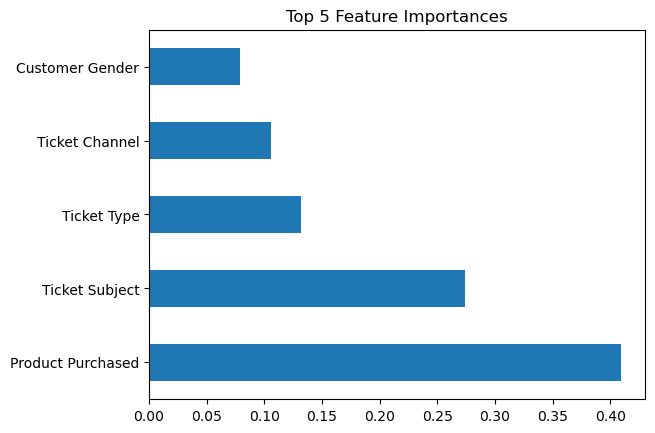

In [34]:
feature_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feature_importances.nlargest(5).plot(kind='barh')
plt.title('Top 5 Feature Importances')
plt.show()

In [35]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[20 25 25 21 18]
 [19 25 30 28 15]
 [20 24 26 22 20]
 [20 18 23 26 21]
 [22 20 21 22 23]]

Classification Report:
              precision    recall  f1-score   support

         1.0       0.20      0.18      0.19       109
         2.0       0.22      0.21      0.22       117
         3.0       0.21      0.23      0.22       112
         4.0       0.22      0.24      0.23       108
         5.0       0.24      0.21      0.22       108

    accuracy                           0.22       554
   macro avg       0.22      0.22      0.22       554
weighted avg       0.22      0.22      0.22       554



In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred = model.predict(X_test)

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error',mse)

r2 = r2_score(y_test,y_pred)
print('R2 Score',r2)

Mean Squared Error 1.972302514672882
R2 Score 0.00011529780535179945


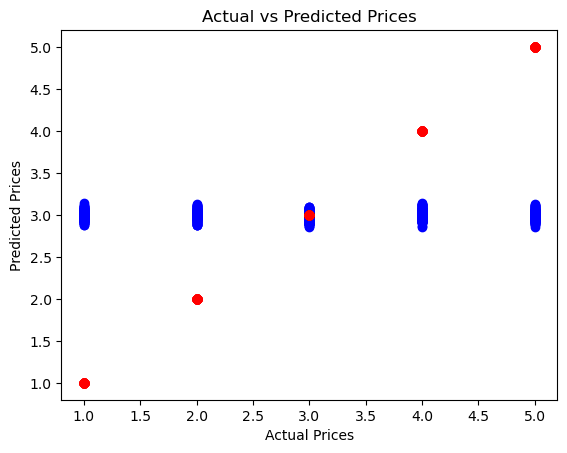

In [41]:
plt.scatter(y_test, y_pred,color='blue')
plt.scatter(y_test, y_test,color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()
